<a href="https://colab.research.google.com/github/pinkesh-ai/DL201/blob/main/08_PPAi21V1_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 24.2MB/s 
     |████████████████████████████████| 1.2MB 23.7MB/s 
     |████████████████████████████████| 194kB 35.7MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

[MovieLens](https://grouplens.org/datasets/movielens/). 

The dataset is available through the usual fastai function:

In [3]:
from fastai.collab import *
from fastai.tabular.all import *
path = untar_data(URLs.ML_100k)

In [4]:
[p.name for p in path.ls() if 'READ' in p.name or 'read' in p.name]

['README']

In [5]:
#hide
with open(path/'README', 'r') as f:
    print(f.read())

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

In [6]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=['user','movie','rating','timestamp'])
ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


`movie xtab` : cross-tabulated/Excel version

**`movie xtab`:**

<img alt="Crosstab of movies and users" width="632" caption="Crosstab of movies and users" id="movie_xtab" src="https://github.com/fastai/fastbook/blob/master/images/att_00040.png?raw=1">

In [7]:
# Latent Factors: science-fiction, action, old movies
last_skywalker = np.array([0.98,0.9,-0.9])

In [8]:
# Latent Factors: science-fiction, action, old movies
user1 = np.array([0.9,0.8,-0.6])

###calculate the match between this combination:

In [9]:
(user1 * last_skywalker).sum()

2.1420000000000003

represent the movie *Casablanca* as:

In [10]:
# Latent Factors: science-fiction, action, old movies
casablanca = np.array([-0.99,-0.3,0.8])

The match between this combination is (dot product):

In [11]:
(user1 * casablanca).sum()

-1.611

## Creating the DataLoaders ( Panda) 



In [12]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [14]:

dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,user,title,rating
0,542,My Left Foot (1989),4
1,422,Event Horizon (1997),3
2,311,"African Queen, The (1951)",4
3,595,Face/Off (1997),4
4,617,Evil Dead II (1987),1
5,158,Jurassic Park (1993),5
6,836,Chasing Amy (1997),3
7,474,Emma (1996),3
8,466,Jackie Chan's First Strike (1996),3
9,554,Scream (1996),3


In [15]:
dls.classes

{'title': ['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (199

In [16]:

n_users  = len(dls.classes['user'])
n_movies = len(dls.classes['title'])
n_factors = 5

user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)

user_factors.shape, movie_factors.shape

(torch.Size([944, 5]), torch.Size([1665, 5]))

In [17]:
one_hot_3 = one_hot(3, n_users).float()

In [ ]:
# Showing the first 10 values in one_hot_3 tensor. All 0 except at index 3
one_hot_3[0:20]

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
user_factors.t() @ one_hot_3

tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])

In [19]:
user_factors[3]

tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])

Embeddings: We will attribute to each of our users and each of our movies a random vector of a certain length (here, `n_factors=5`), and we will make those learnable parameters. 

## Collaborative Filtering from Scratch

In [20]:
class Example:
    def __init__(self, a): self.a = a
    def say(self,x): return f'Hello {self.a}, {x}.'

In [22]:
ex = Example('Sylvain')
ex.say('nice to meet you')

'Hello Sylvain, nice to meet you.'

In [23]:
#Inheritance, Superclass , Forward 
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return (users * movies).sum(dim=1)

In [24]:
x, y = dls.one_batch()
x.shape

torch.Size([64, 2])

In [ ]:
#Plain Learner, MSElossFlat=Mean Squared loss 
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

Model

In [26]:
learn.fit_one_cycle(5, 5e-3)

NameError: ignored

In [27]:
#Architechture (0,5.5)
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return sigmoid_range((users * movies).sum(dim=1), *self.y_range)

In [28]:
#Lossflat 
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.986318,0.982691,00:10
1,0.881904,0.910403,00:10
2,0.672882,0.874707,00:10
3,0.467608,0.877899,00:10
4,0.351737,0.882970,00:10


Adjust model architecture:

In [29]:
#Dot Product Bias
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.movie_bias = Embedding(n_movies, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

Let's try training this and see how it goes:

In [30]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.930271,0.942387,00:11
1,0.817584,0.869971,00:12
2,0.614231,0.867044,00:11
3,0.412205,0.889790,00:11
4,0.299350,0.896558,00:10


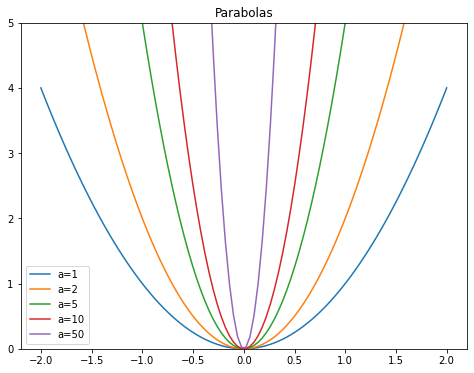

In [31]:
#Weight decay ( L2Regularization)
x = np.linspace(-2,2,100)
a_s = [1,2,5,10,50] 
ys = [a * x**2 for a in a_s]
_,ax = plt.subplots(figsize=(8,6))
for a,y in zip(a_s,ys): ax.plot(x,y, label=f'a={a}')
ax.set_ylim([0,5])
ax.set_title('Parabolas')
ax.legend();

In [32]:
#Same Paramm Added Wd
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.935395,0.949589,00:11
1,0.877538,0.875936,00:11
2,0.716325,0.835028,00:11
3,0.603237,0.822503,00:11
4,0.476814,0.823543,00:11


Much better!

### Creating Our Own Embedding Module

In [33]:
class T(Module):
    def __init__(self): 
        self.a = torch.ones(3)

L(T().parameters())

(#0) []

tensor as a parameter

In [34]:
class T(Module):
    def __init__(self): 
        self.a = nn.Parameter(torch.ones(3))

L(T().parameters())

(#1) [Parameter containing:
tensor([1., 1., 1.], requires_grad=True)]

All PyTorch modules use `nn.Parameter` for any trainable parameters, which is why we haven't needed to explicitly use this wrapper up until now:

In [35]:
class T(Module):
    def __init__(self): 
        self.a = nn.Linear(1, 3, bias=False)

t = T()
L(t.parameters())

(#1) [Parameter containing:
tensor([[-0.1875],
        [ 0.0791],
        [-0.3082]], requires_grad=True)]

In [36]:
t.a.weight

Parameter containing:
tensor([[-0.1875],
        [ 0.0791],
        [-0.3082]], requires_grad=True)

In [37]:
type(t.a.weight)

torch.nn.parameter.Parameter

We can create a tensor as a parameter, with random initialization, like so:

In [38]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

Let's use this to create `DotProductBias` again, but without `Embedding`:

In [39]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies, n_factors])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors[x[:,0]]
        movies = self.movie_factors[x[:,1]]
        res = (users*movies).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return sigmoid_range(res, *self.y_range)

Then let's train it again to check we get around the same results we saw in the previous section:

In [40]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.916084,0.944496,00:10
1,0.874252,0.873762,00:10
2,0.752070,0.829019,00:11
3,0.587466,0.820674,00:11
4,0.489055,0.821463,00:10


Now, let's take a look at what our model has learned.

## Interpreting Embeddings and Biases

In [41]:
movie_bias = learn.model.movie_bias.squeeze()
idxs = movie_bias.argsort()[:5]
[dls.classes['title'][i] for i in idxs]

['Children of the Corn: The Gathering (1996)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)',
 'Crow: City of Angels, The (1996)',
 'Robocop 3 (1993)',
 'Beautician and the Beast, The (1997)']

In [42]:
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

['L.A. Confidential (1997)',
 "Schindler's List (1993)",
 'Titanic (1997)',
 'Silence of the Lambs, The (1991)',
 'Star Wars (1977)']

*principal component analysis* (PCA): 

`PCA for Movies` shows what our movies look like based on two of the strongest PCA components.

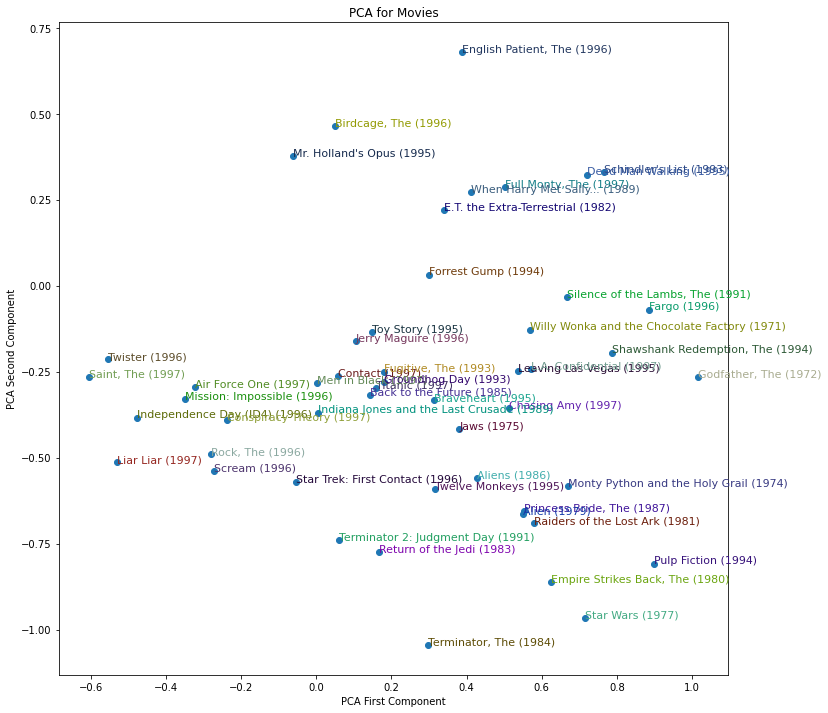

In [43]:
#Ascending
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes['title'].o2i[m] for m in top_movies])
movie_w = learn.model.movie_factors[top_idxs].cpu().detach()

movie_pca = movie_w.pca(3)
fac0, fac1, fac2 = movie_pca.t()
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]

plt.figure(figsize=(12,12))
plt.scatter(X, Y)
plt.title('PCA for Movies')
plt.xlabel('PCA First Component')
plt.ylabel('PCA Second Component')

for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x, y, i, color=np.random.rand(3) * 0.7, fontsize=11)

plt.show();

### Using fastai.collab

We can create and train a collaborative filtering model using the exact structure shown earlier by using fastai's `collab_learner`:

In [44]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

In [45]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.930386,0.954203,00:11
1,0.870293,0.882454,00:11
2,0.730028,0.837537,00:10
3,0.593131,0.824676,00:11
4,0.488595,0.824378,00:10


The names of the layers can be seen by printing the model:

In [46]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

We can use these to replicate any of the analyses we did in the previous section—for instance:

In [47]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

['Titanic (1997)',
 'Shawshank Redemption, The (1994)',
 'Silence of the Lambs, The (1991)',
 'L.A. Confidential (1997)',
 "Schindler's List (1993)"]

Another interesting thing we can do with these learned embeddings is to look at _distance_.

### Embedding Distance

In [48]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Silence of the Lambs, The (1991)']

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Farewell to Arms, A (1932)'

## Bootstrapping a Collaborative Filtering Model

Our dot product model works quite well, and it is the basis of many successful real-world recommendation systems. This approach to collaborative filtering is known as *probabilistic matrix factorization* (PMF). Another approach, which generally works similarly well given the same data, is deep learning.

## Deep Learning for Collaborative Filtering

In [49]:
embs = get_emb_sz(dls)
embs

[(944, 74), (1665, 102)]

Let's implement this class:

In [50]:
class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0,5.5), n_act=100):
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)
        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1))
        self.y_range = y_range
        
    def forward(self, x):
        embs = self.user_factors(x[:,0]), self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)

And use it to create a model:

In [51]:
model = CollabNN(*embs)

In [52]:
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,0.929010,0.952368,00:13
1,0.871890,0.912853,00:13
2,0.845534,0.884838,00:13
3,0.817962,0.879116,00:13
4,0.762106,0.881303,00:13


fastai provides this model in `fastai.collab` if you pass `use_nn=True` in your call to `collab_learner` (including calling `get_emb_sz` for you), and it lets you easily create more layers. For instance, here we're creating two hidden layers, of size 100 and 50, respectively:

In [53]:
learn = collab_learner(dls, use_nn=True, y_range=(0, 5.5), layers=[100,50])
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.984726,0.973044,00:15
1,0.947269,0.911754,00:15
2,0.874077,0.890626,00:15
3,0.831445,0.863315,00:15
4,0.760144,0.863972,00:15


`learn.model` is an object of type `EmbeddingNN`. Let's take a look at fastai's code for this class:

In [54]:
@delegates(TabularModel)
class EmbeddingNN(TabularModel):
    def __init__(self, emb_szs, layers, **kwargs):
        super().__init__(emb_szs, layers=layers, n_cont=0, out_sz=1, **kwargs)

## Conclusion

For our first non-computer vision application, we looked at recommendation systems and saw how gradient descent can learn intrinsic factors or biases about items from a history of ratings. Those can then give us information about the data. 

We also built our first model in PyTorch. We will do a lot more of this in the next section of the book, but first, let's finish our dive into the other general applications of deep learning, continuing with tabular data.

# unpackAI Assignments

Current assignments are marked with `>>`:


| Week | Topic                             | Chapters                  |Assignment                                                             | Comments / Links |
|:----:|:----------------------------------|:--------------------------|:----------------------------------------------------------------------|:----------------|
| 1    | Warm-up Session                   |                           | No assignment                                                         | -
| 2    | Recap/Refresh SGD                 | Chapter 4, MNIST Basic    | Make a model using SGD for the full MNIST dataset. Built from scratch |https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/resources/04_mnist_full_set_sgd_with_gpu.ipynb 
|      |                                   | Chapter 5, Pet Breeds     | Read sections on Cross-Entropy Loss to use in your model. You may skip the rest|
| 3    | More on CV                        | Chapter 5, Pet Breeds     | Read notebook, run it and perform assignments at the bottom           |https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/05_pet_breeds.ipynb
|      | (Learn the theory)                | Chapter 6, Multi-Category | Read notebook, run it and perform assignments at the bottom           |https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/06_multicat.ipynb
|      |                                   | Chapter 7, Sizing and TTA | Read notebook, run it and perform assignments at the bottom           |https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/07_sizing_and_tta.ipynb
|4     | Bring together all CV             | All CV chapters           | Final challenge with MNIST                                            |https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/resources/dl201_pract_1.ipynb
|      | (Practical Exercises)             | All CV chapters           | Take the model you trained in Ch 2, and use any methods learned to improve it.  | - 
|5     | Tabular/Colaborative Filtering    | >> Chapter 8, Collab         | Read notebook and run it  | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/08_collab.ipynb
|      | (Learn the theory)                | >> Chapter 8, Collab         | Write your own code in a new notebooks and run your models. | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/own_code_templates/08_collab_own_code.ipynb
|      |                                   | >> Chapter 8, Collab         | Run additional code and reflect at questions in bold | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/08_collab.ipynb
|      |                                   | >> Chapter 9, Tabular        | Read notebook and run it    | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/09_tabular.ipynb
|      |                                   | >> Chapter 9, Tabular        | Write your own code in a new notebooks and run your models.  | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/own_code_templates/09_tabular_own_code.ipynb
|      |                                   | >> Chapter 9, Tabular        | Run additional code and reflect at questions in bold | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/09_tabular.ipynb


## Assignment 1: Write your own code

Write your own code in a new notebook by refactoring the code in this notebook to make it more compact and understandable for your future self. At the minimum:
- Load *MovieLens* dataset and create the DataLoaders
- Create and run one model using probalistic matrix factorization (PMF)
- Create and run one model using deep learning

You can use this [template](https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/own_code_templates/08_collab_own_code.ipynb) to guide you.

## Assignment 2: Run additional code

### Access `Embedding` and work with them

In [ ]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

Get the name of the embeddings tensors:

In [ ]:
learn.model

Retrieve different type of information and convert from encoded values/index and the original values:

In [ ]:
dls.classes

In [ ]:
dls.classes['title'][3]

In [ ]:
dls.classes['title'].o2i['101 Dalmatians (1996)']

In [ ]:
m_list = [619, 774, 613, 624]
for m in m_list:
    print(dls.classes['title'][m])

In [ ]:
dls.classes['title'].o2i['Gone with the Wind (1939)']

In [ ]:
# dls.classes['title'].o2i

Retrieve the value of the parameters in one of these tensors:

In [ ]:
learn.i_weight.weight

Get the 50 latent factor associated with a particular user

In [ ]:
idxs = [619]
print(f"Latent Factors for: {dls.classes['title'][idxs]}")
learn.u_weight.weight[idxs]

We also can get these for a batch of users

In [ ]:
idxs = [619, 774, 613, 624]
print(f"Latent Factors for: {dls.classes['title'][idxs]}\n")
learn.u_weight.weight[idxs]

Obviously, these are randomly initiatlized values, before training. Let's train and get the learned parameters

In [ ]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

In [ ]:
idxs = [1, 10, 56, 106]
print(f"Latent Factors for user with ID: {dls.classes['user'][idxs]}\n")
learn.u_weight.weight[idxs]

In [ ]:
idxs = [619, 774, 613, 624]
print(f"Latent Factors for: {dls.classes['title'][idxs]}\n")
learn.i_weight.weight[idxs]

### Interpret collaborative filtering results for specific movies

Pick a few movies you know from the list and extract the n closest movies as defined by the model. 

To get a list of all the movies in the dataset: use `dls.classes['title'].o2i`

Does it make sense to you? Give you thought for each picked movie.

In [ ]:
movie_title = 'Gone with the Wind (1939))'
n = 5

movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[movie_title]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1:n+1]
list(dls.classes['title'][idx])

In [ ]:
movie_title = 'Jaws (1975)'
n = 5

movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[movie_title]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1:n+1]
list(dls.classes['title'][idx])

In [ ]:
movie_title = 'Godfather, The (1972)'
n = 5

movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[movie_title]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1:n+1]
list(dls.classes['title'][idx])

In [ ]:
movie_title = 'GoodFellas (1990)'
n = 5

movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[movie_title]

distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])

idx = distances.argsort(descending=True)[1:n+1]
list(dls.classes['title'][idx])

Does this make sense to you? What makes sens and what does not?
- ...
- ...

### Effect of Weight Decay
In fastai, unless we specify otherwise, the optimiser used in `Adam`, which is more efficient then a simple `SGD`, and `Adam` has a `wd` factor of 0.01 by default.

Let's see what the effect of different weight decays are.

In [ ]:
# Create the Collab Filtering model

class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.movie_bias = Embedding(n_movies, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

In [ ]:
wd_test = 0.0
lr = 5e-3
epochs = 5

set_seed(1988, reproducible=True)

dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
model = DotProductBias(n_users, n_movies, 50)
learn_no_wd = Learner(dls, model, loss_func=MSELossFlat())
learn_no_wd.fit_one_cycle(epochs, lr, wd=wd_test)
learn_no_wd.recorder.plot_loss()

You can use the argument `skip_start` to zoom in the later part of the loss plot

In [ ]:
learn_no_wd.recorder.plot_loss(skip_start=1000)

Can you see the overfitting? How do you see that?
- ..
- ..

In [ ]:
wd_test = 0.1
lr = 5e-3
epochs = 5

set_seed(1988, reproducible=True)

dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
model = DotProductBias(n_users, n_movies, 50)
learn_typical_wd = Learner(dls, model, loss_func=MSELossFlat())
learn_typical_wd.fit_one_cycle(epochs, lr, wd=wd_test)
learn_typical_wd.recorder.plot_loss()

In [ ]:
learn_typical_wd.recorder.plot_loss(skip_start=1000)

What difference do you see? Does is still overfit? Why?
- ..
- ..

In [ ]:
wd_test = 0.75
lr = 5e-3
epochs = 5

set_seed(1988, reproducible=True)

dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
model = DotProductBias(n_users, n_movies, 50)
learn_big_wd = Learner(dls, model, loss_func=MSELossFlat())
learn_big_wd.fit_one_cycle(epochs, lr, wd=wd_test)
learn_big_wd.recorder.plot_loss()

In [ ]:
learn_big_wd.recorder.plot_loss(skip_start=1000)

Does this model overfit? Do you see any other problem?
- ..
- ..

## Assigment 3: Reflect on Questionnaire 
Pay special attention to questions in bold

1. **What problem does collaborative filtering solve?**

1. How does it solve it?
1. Why might a collaborative filtering predictive model fail to be a very useful recommendation system?
1. What does a crosstab representation of collaborative filtering data look like?
1. Write the code to create a crosstab representation of the MovieLens data (you might need to do some web searching!).
1. **What is a latent factor? Why is it "latent"?**
1. What is a dot product? Calculate a dot product manually using pure Python with lists.
1. What does `pandas.DataFrame.merge` do?
1. **What is an embedding matrix?**
1. What is the relationship between an embedding and a matrix of one-hot-encoded vectors?
1. Why do we need `Embedding` if we could use one-hot-encoded vectors for the same thing?
1. What does an embedding contain before we start training (assuming we're not using a pretained model)?
1. Create a class (without peeking, if possible!) and use it.
1. What does `x[:,0]` return?
1. Rewrite the `DotProduct` class (without peeking, if possible!) and train a model with it.
1. **What is a good loss function to use for MovieLens? Why? **
1. What would happen if we used cross-entropy loss with MovieLens? How would we need to change the model?
1. **What is the use of bias in a dot product model?**
1. What is another name for weight decay?
1. Write the equation for weight decay (without peeking!).
1. Write the equation for the gradient of weight decay. Why does it help reduce weights?
1. **Why does reducing weights lead to better generalization?**
1. What does `argsort` do in PyTorch?
1. Does sorting the movie biases give the same result as averaging overall movie ratings by movie? Why/why not?
1. How do you print the names and details of the layers in a model?
1. What is the "bootstrapping problem" in collaborative filtering?
1. **How could you deal with the bootstrapping problem for new users? For new movies?**
1. How can feedback loops impact collaborative filtering systems?
1. **When using a neural network in collaborative filtering, why can we have different numbers of factors for movies and users?**
1. Why is there an `nn.Sequential` in the `CollabNN` model?
1. What kind of model should we use if we want to add metadata about users and items, or information such as date and time, to a collaborative filtering model?

### Further Research

1. Take a look at all the differences between the `Embedding` version of `DotProductBias` and the `create_params` version, and try to understand why each of those changes is required. If you're not sure, try reverting each change to see what happens. (NB: even the type of brackets used in `forward` has changed!)
1. Find three other areas where collaborative filtering is being used, and find out what the pros and cons of this approach are in those areas.
1. Complete this notebook using the full MovieLens dataset, and compare your results to online benchmarks. See if you can improve your accuracy. Look on the book's website and the fast.ai forum for ideas. Note that there are more columns in the full dataset—see if you can use those too (the next chapter might give you ideas).
1. Create a model for MovieLens that works with cross-entropy loss, and compare it to the model in this chapter.